In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

In [2]:
# Required Functions
def plot(time,var,x,y,z,*args):
  fig,ax=plt.subplots(1,3,figsize=(15,3))
  ax[0].plot(time,x)
  ax[0].set_xlabel('Time')
  ax[0].set_title(f'X at {args[0]}={var}')
  ax[1].plot(time,y)
  ax[1].set_xlabel('Time')
  ax[1].set_title(f'Y at {args[0]}={var}')
  ax[2].plot(time,z)
  ax[2].set_xlabel('Time')
  ax[2].set_title(f'Z at {args[0]}={var}')
  plt.show()

def bifurcation_plot(sample_dict, sample_arr):
 for i in range(len(sample_arr)):
  ans = np.full(sample_dict[sample_arr[i]].shape, sample_arr[i])
  plt.scatter(ans, sample_dict[sample_arr[i]])

 plt.show()

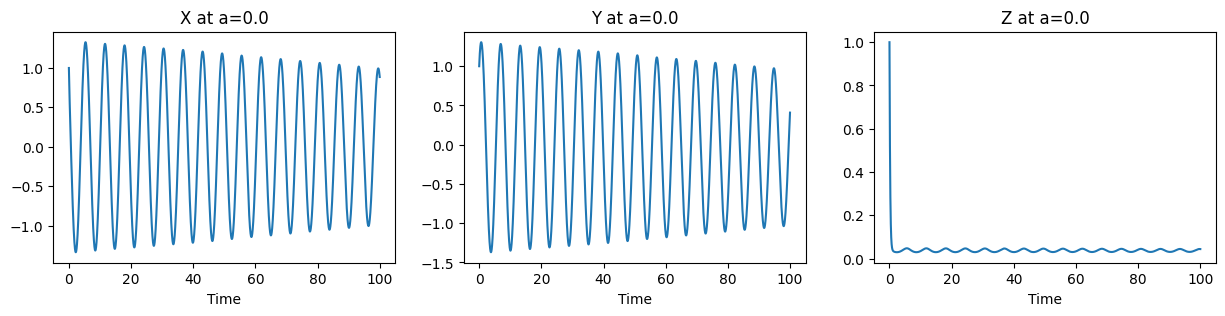

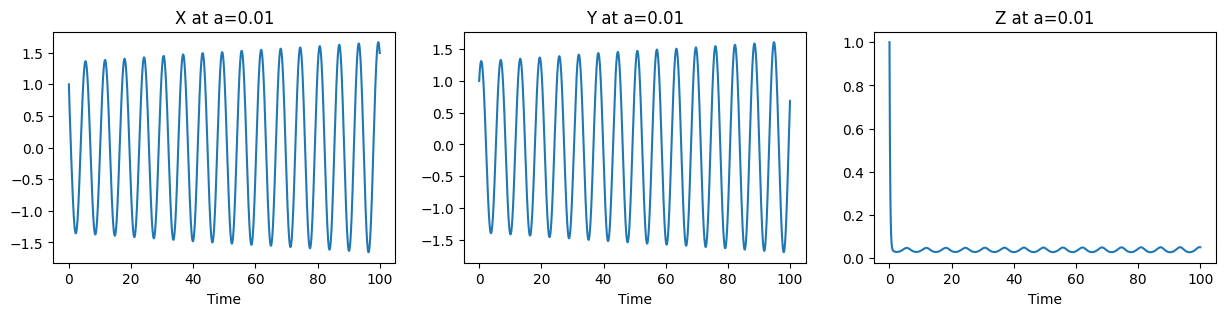

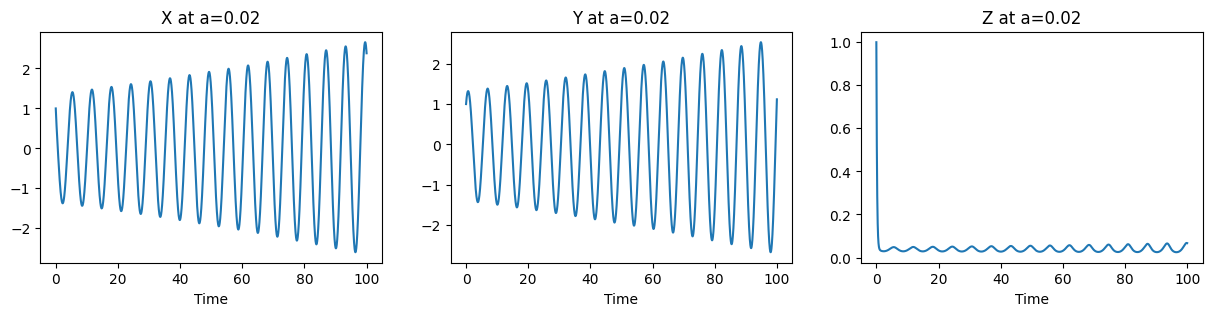

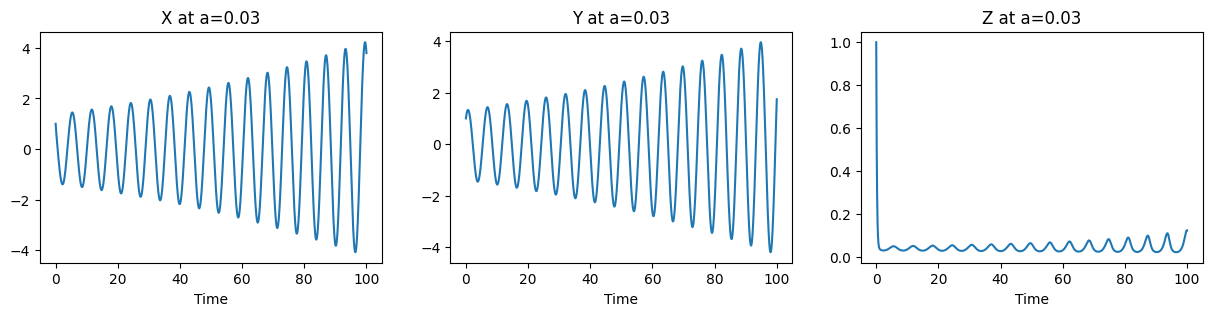

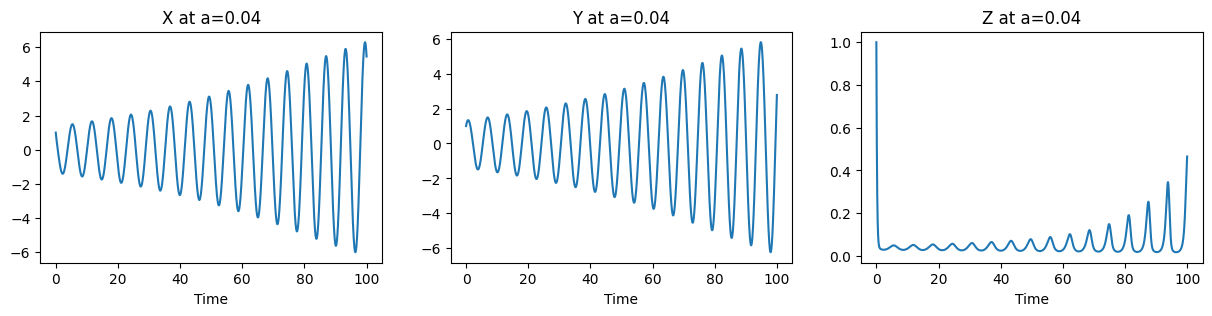

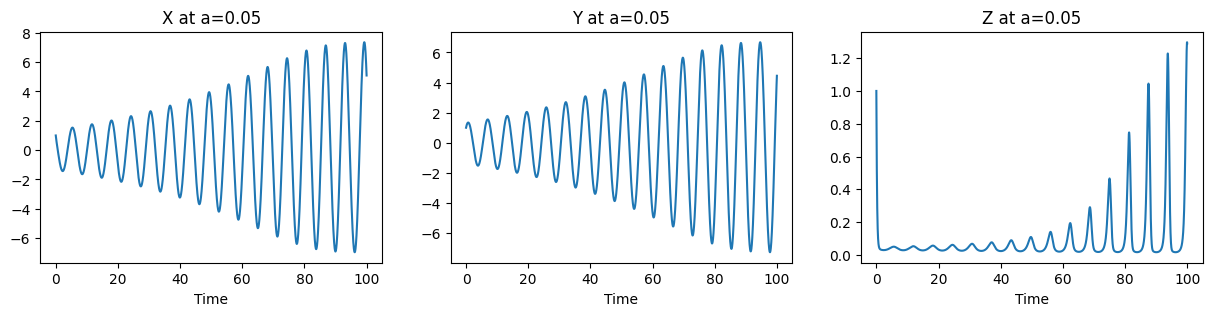

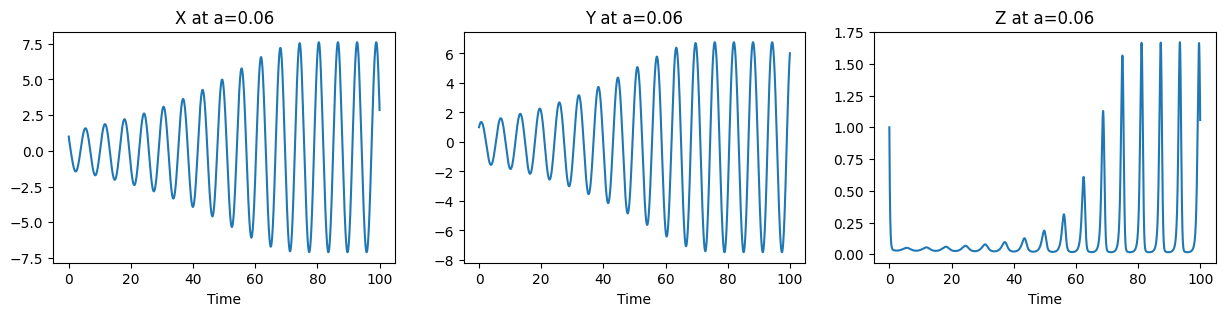

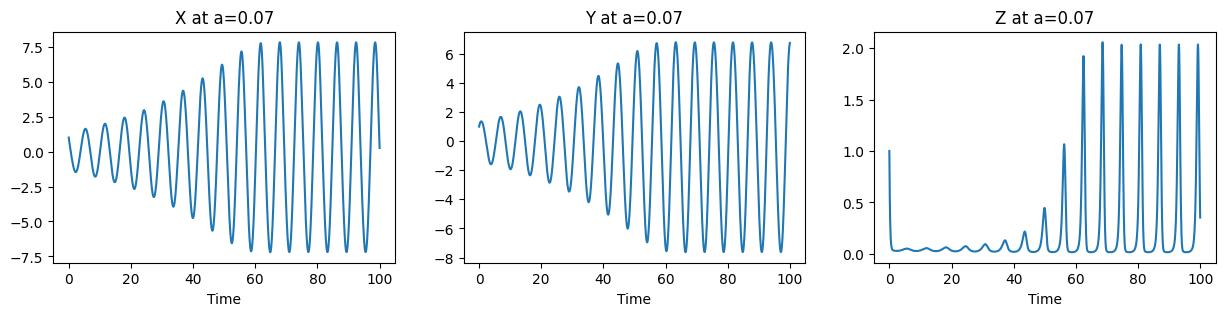

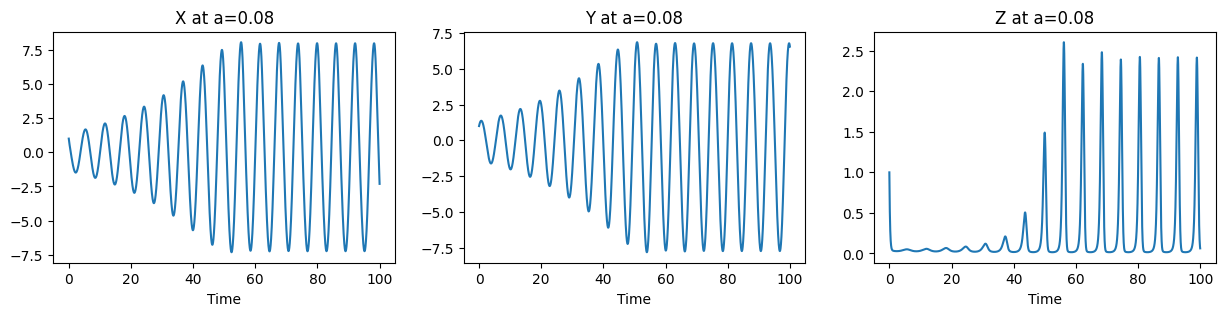

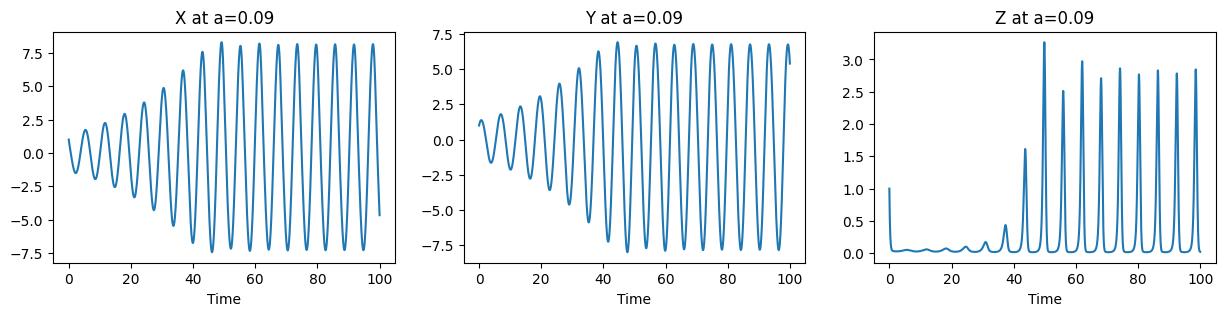

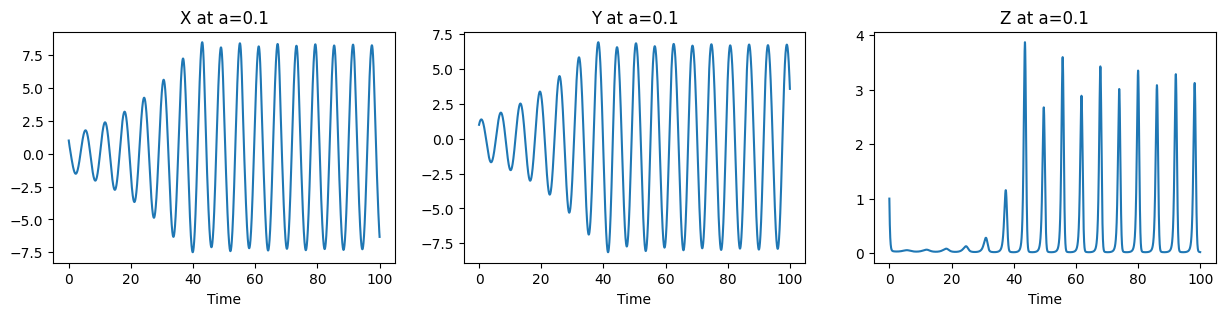

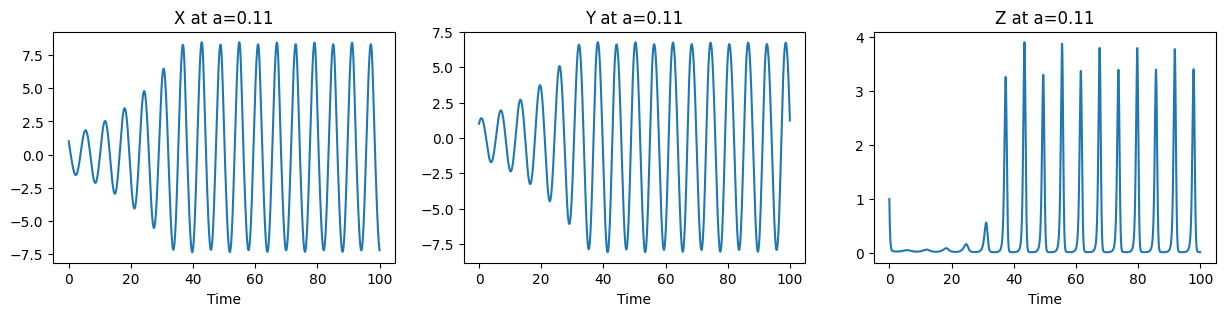

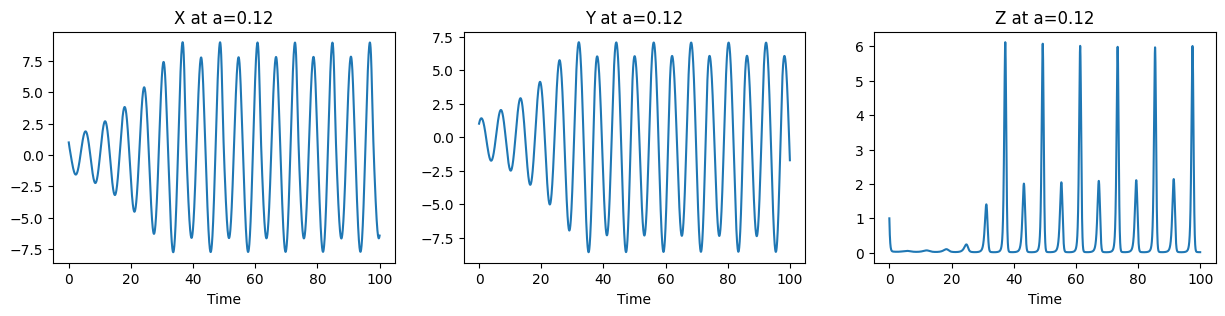

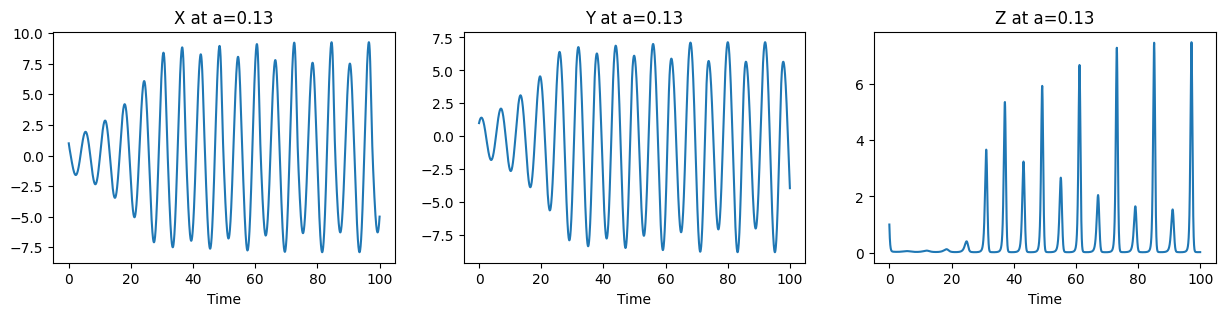

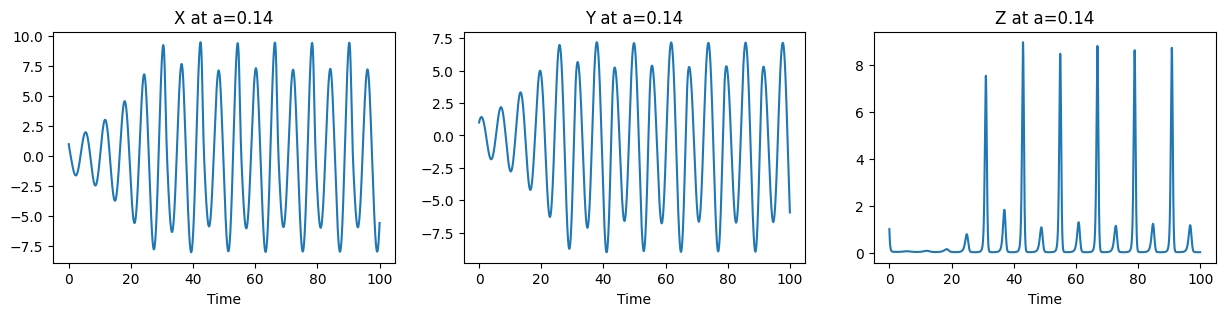

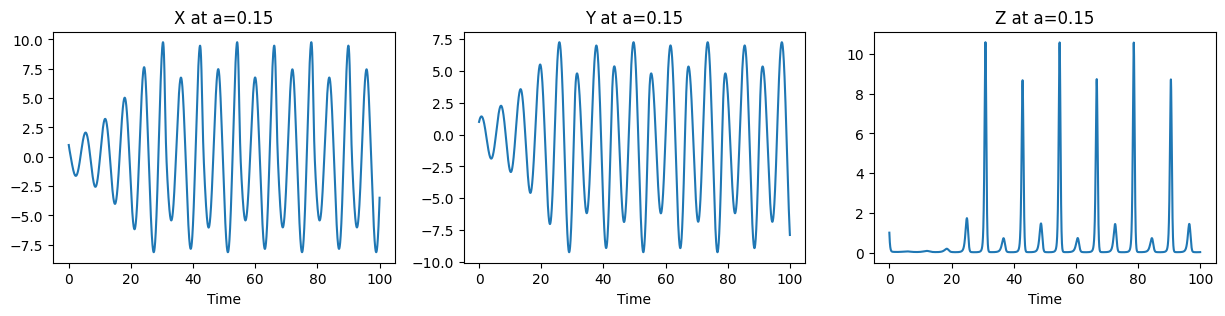

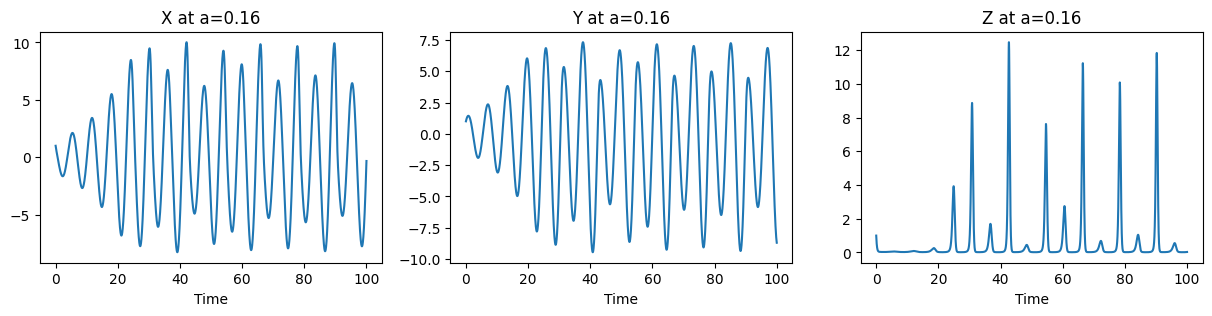

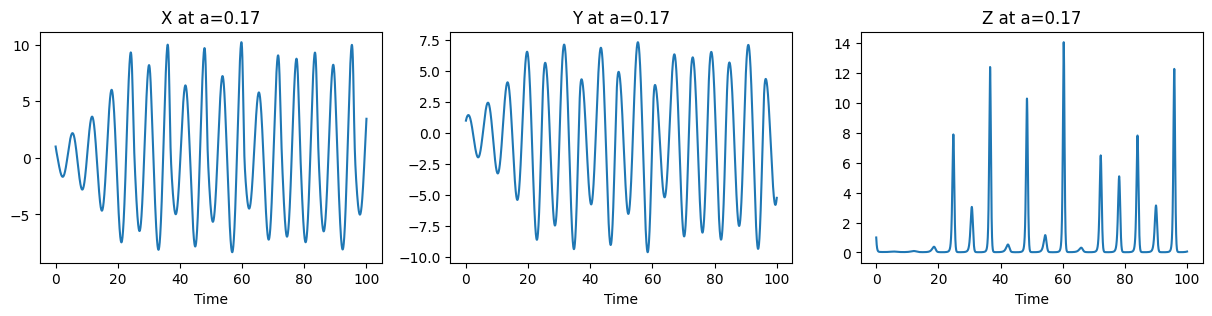

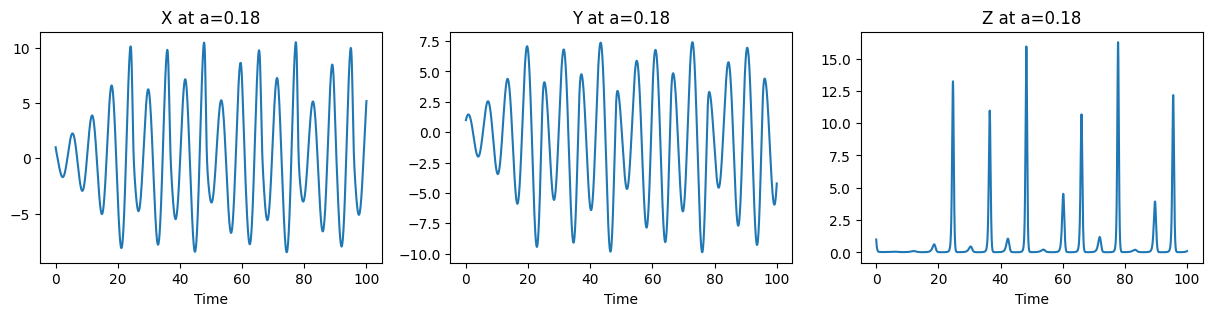

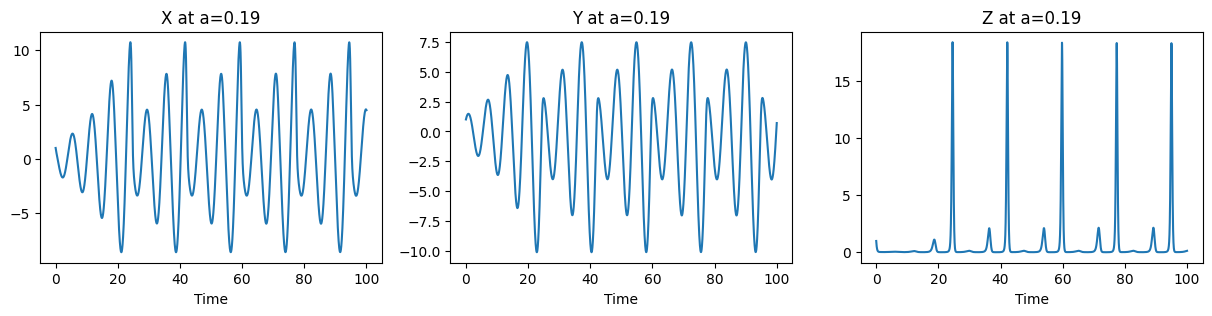

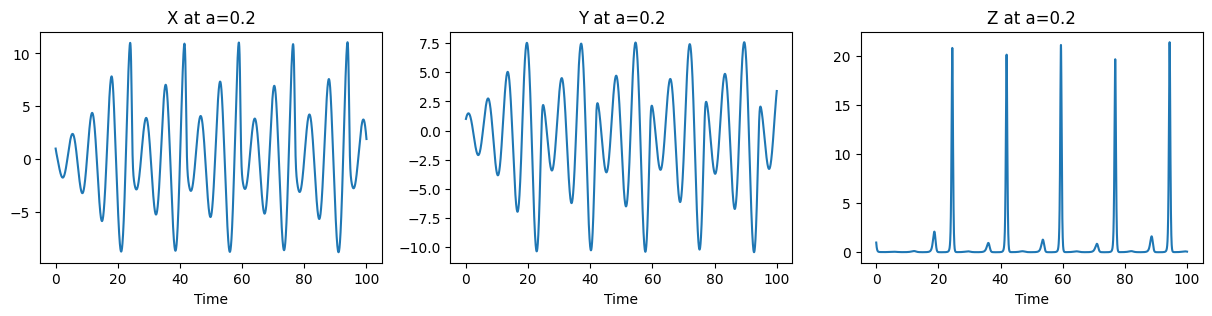

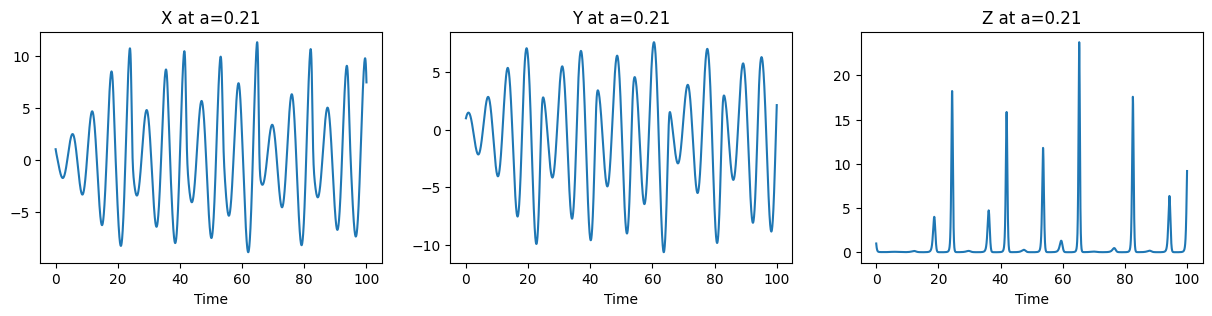

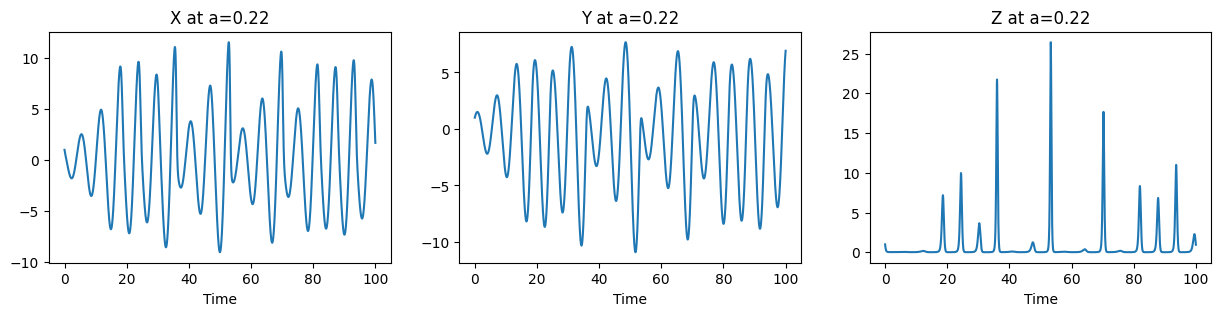

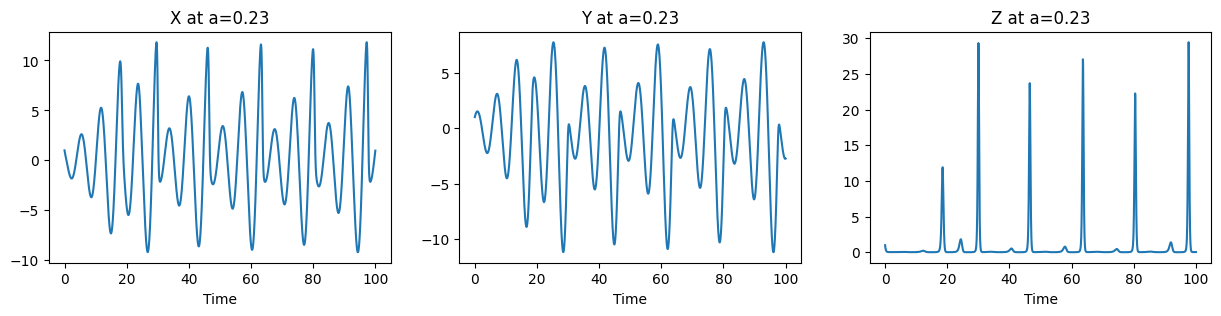

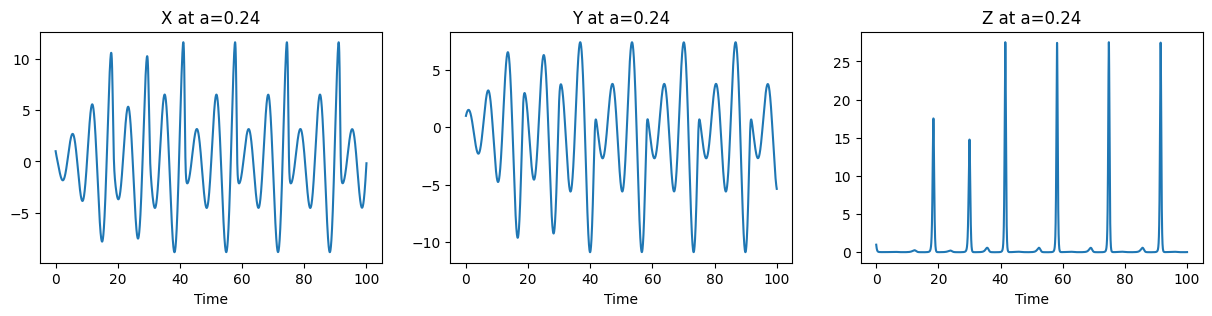

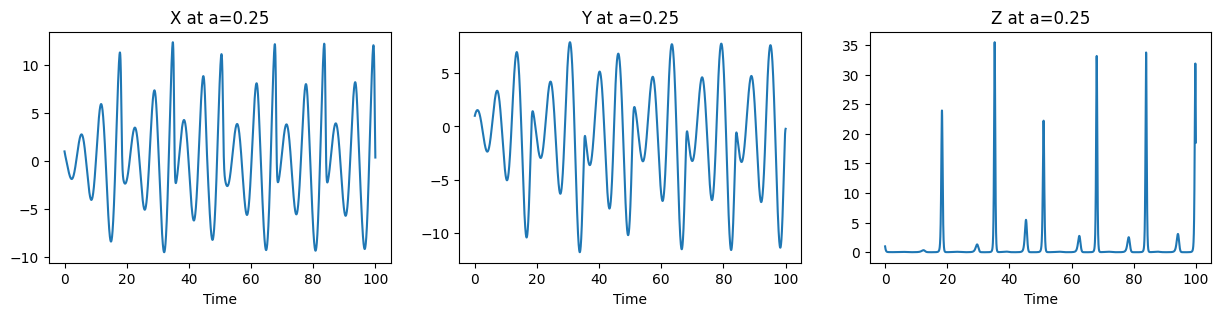

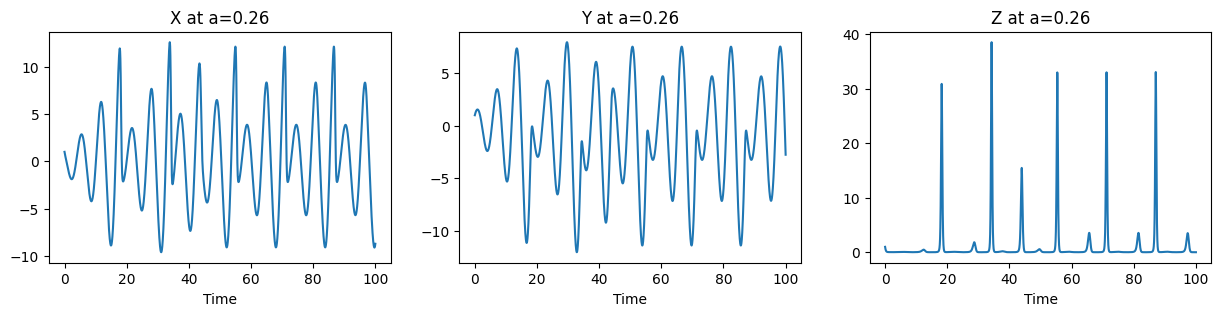

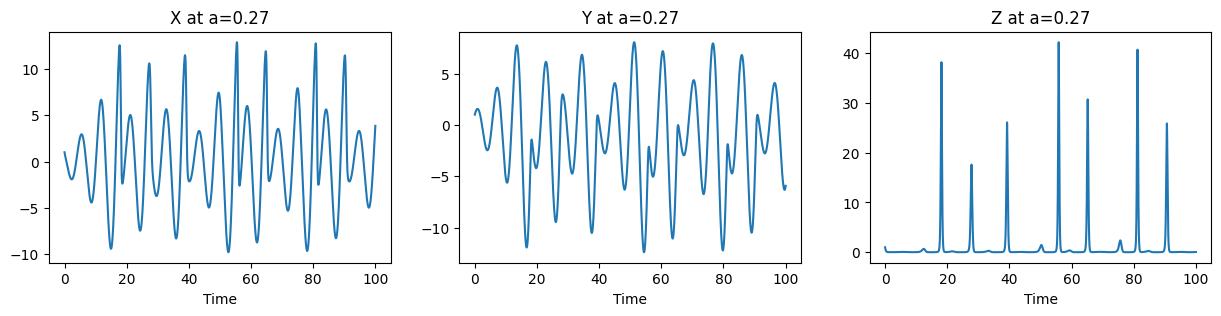

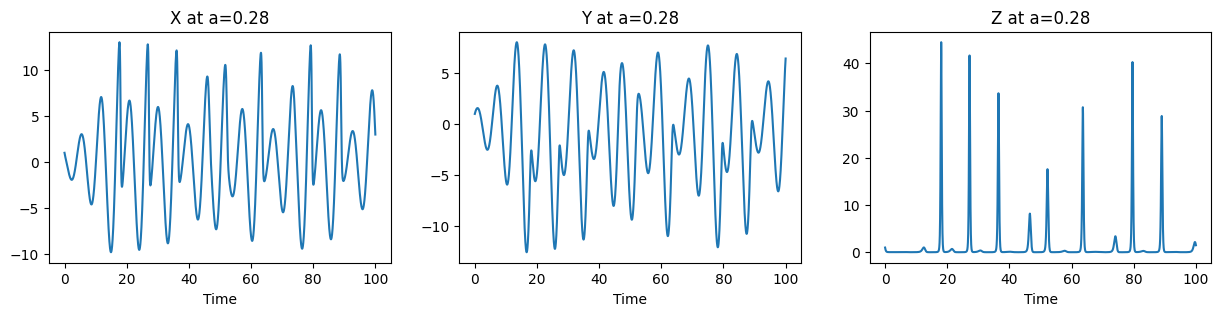

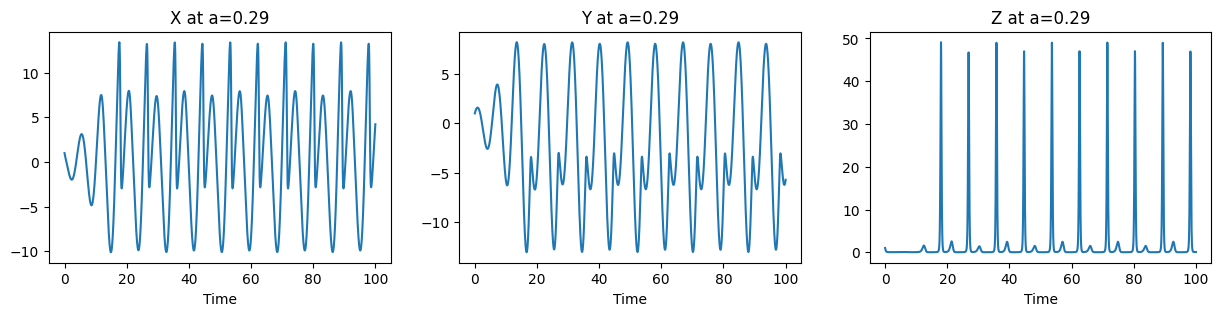

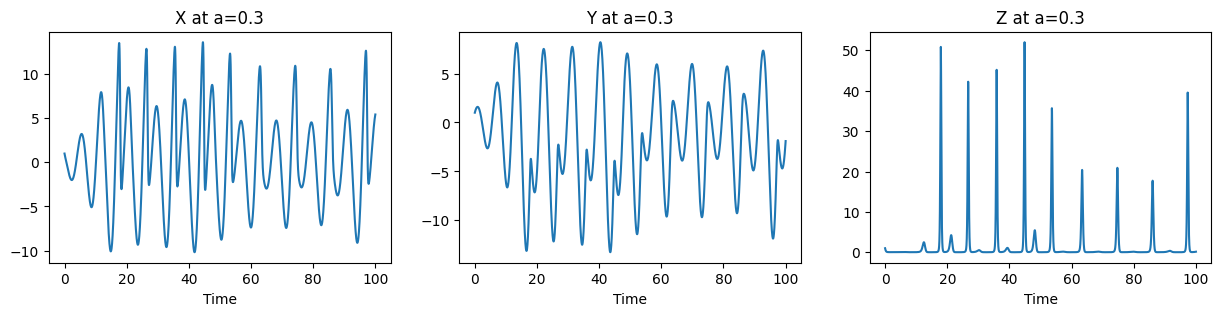

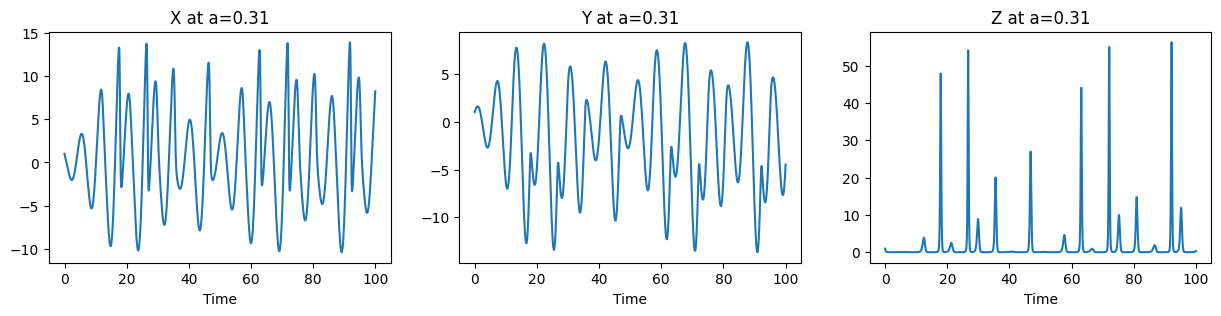

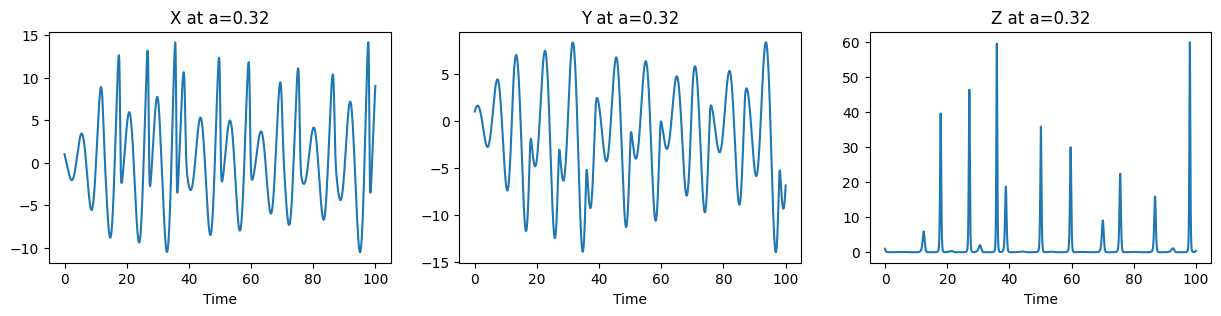

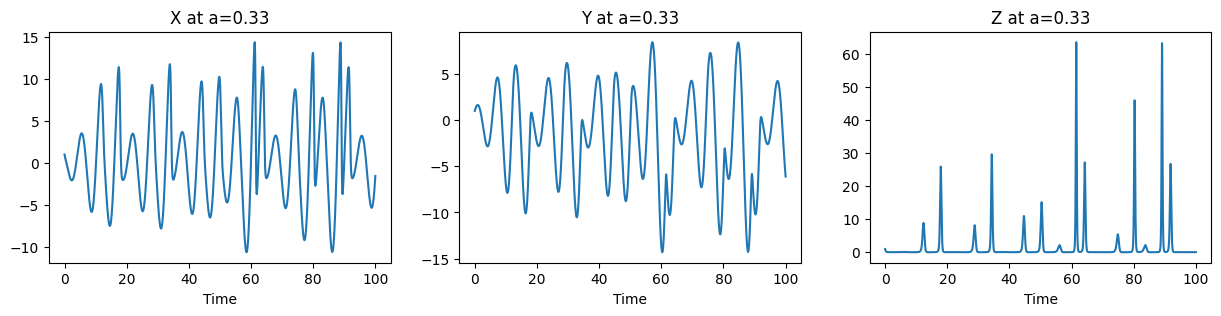

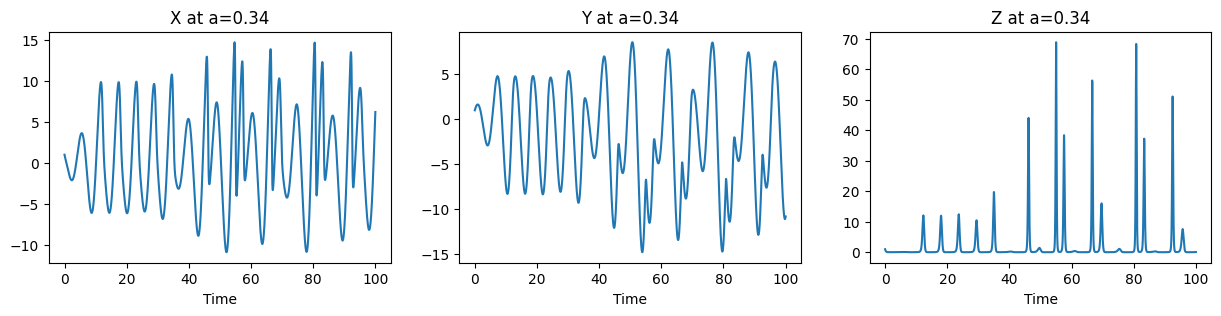

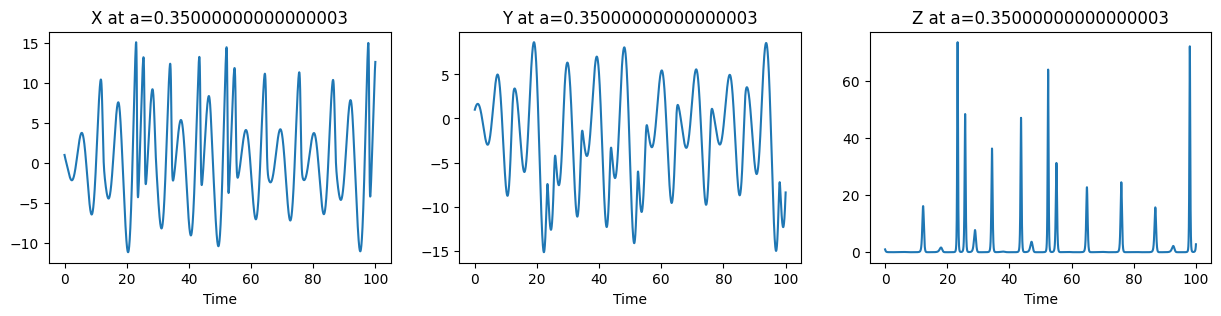

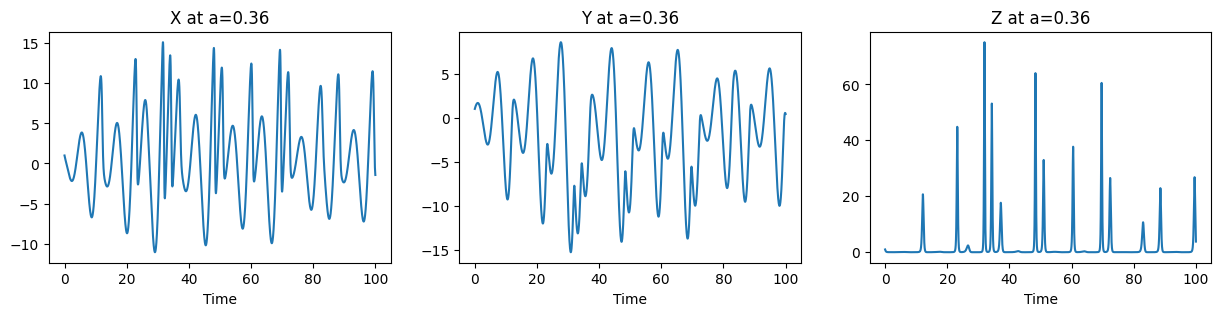

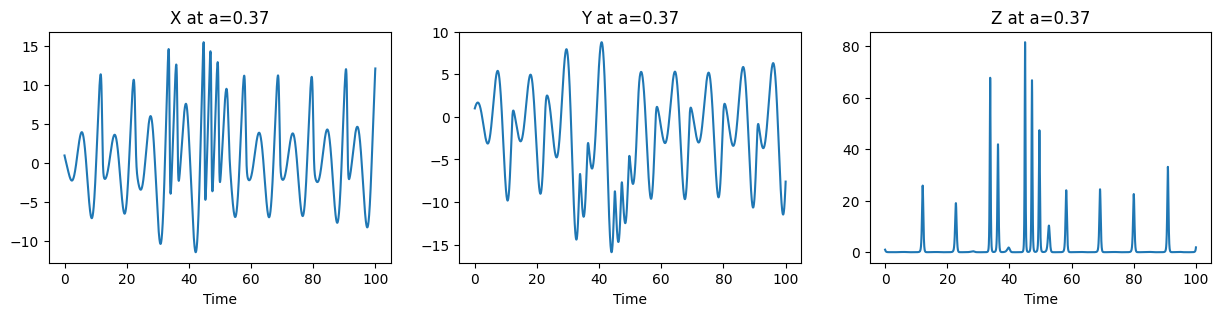

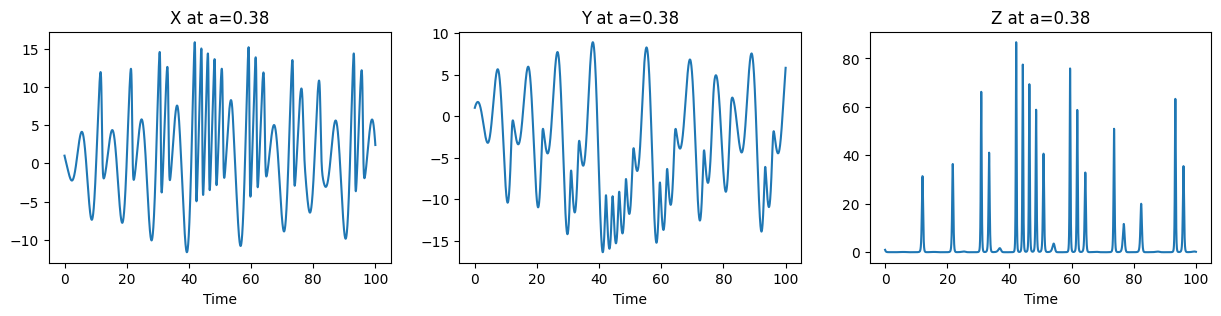

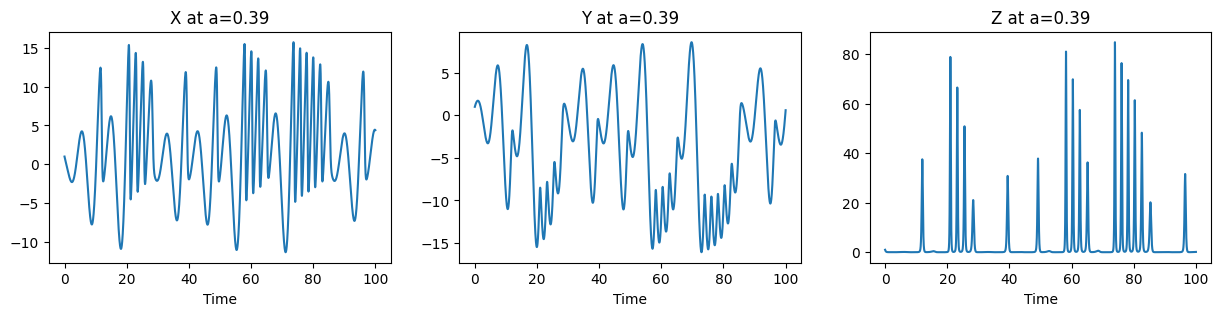

In [3]:
# Rossler System
# Looking for the a parameter

# Equation parameters
c = 5.5
b = 0.2
time = np.linspace(0, 100, 10001)

a_arr=np.arange(0,0.4,0.01)
a_dict={}

for a in a_arr:
# Derivative functions
 def derivatives(t, all):
  x, y, z = all
  dxdt = -y - z
  dydt = x + a * y
  dzdt = b + z * (x - c)
  return [dxdt, dydt, dzdt]

 initials = [1.0, 1.0, 1.0]
 time_span = (time[0], time[-1])

 sol = solve_ivp(derivatives, time_span, initials, method='LSODA', t_eval=time, dense_output=True)

# Extract the solution
 x=sol.y[0]
 y=sol.y[1]
 z=sol.y[2]

 peaks, _ = find_peaks(x, height=0)
 x_arr=x[peaks]
 a_dict[a] = x_arr

# Time domain plots
 label = ('a')
 plot(time,a,x,y,z,*label)

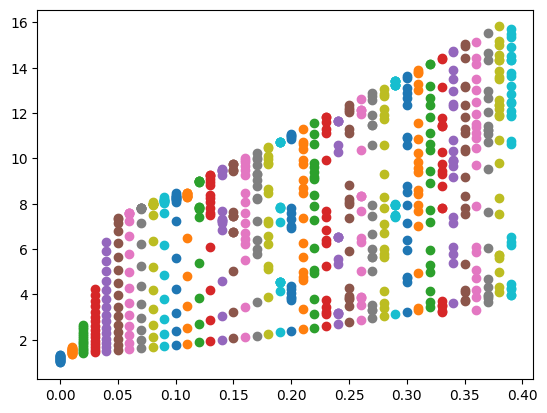

In [4]:
bifurcation_plot(a_dict,a_arr)

In [ ]:
# Rossler System
# Looking for the b parameter

# Equation parameters
c = 5.5
a = 0.2
time = np.linspace(0, 100, 10001)

b_arr=np.linspace(0.2,2,200)
b_dict={}

for b in b_arr:
# Derivative functions
 def derivatives(t, all):
    x, y, z = all
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

 initials = [1.0, 1.0, 1.0]
 time_span = (time[0], time[-1])

 sol = solve_ivp(derivatives, time_span, initials, method='LSODA', t_eval=time, dense_output=True)

# Extract the solution
 x=sol.y[0]
 y=sol.y[1]
 z=sol.y[2]

 peaks, _ = find_peaks(x, height=0)
 x_arr=x[peaks]
 b_dict[b] = x_arr

# Time domain plots
 label=('b')
 plot(time,b,x,y,z,*label)

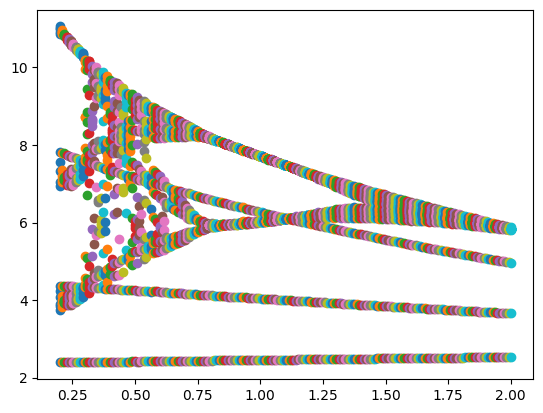

In [6]:
bifurcation_plot(b_dict,b_arr)

In [ ]:
# Rossler System
# Looking for the c parameter

# Equation parameters
a = 0.2
b = 0.2
time = np.linspace(0, 100, 10000)

c_arr=np.linspace(0,10,100)
c_dict={}

for c in c_arr:
# Derivative functions
 def derivatives(t, all):
    x, y, z = all
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

 initials = [1.0, 1.0, 1.0]
 time_span = (time[0], time[-1])

 sol = solve_ivp(derivatives, time_span, initials, method='LSODA', t_eval=time, dense_output=True)

# Extract the solution
 x=sol.y[0]
 y=sol.y[1]
 z=sol.y[2]

 peaks, _ = find_peaks(x, height=0)
 x_arr=x[peaks]
 c_dict[c] = x_arr

# Time domain plots
 label = ('c')
 plot(time,c,x,y,z,*label)

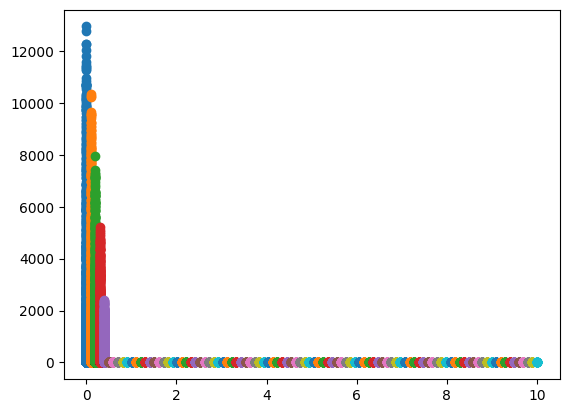

In [9]:
bifurcation_plot(c_dict,c_arr)